In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [18]:
df = pd.read_csv("data/bank_full_limpio.csv")
y_map = {'no':0, 'yes': 1}
df['y'] = df['y'].map(y_map)

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,0,1,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,2,1,0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,7,0,0,0,2,1,1,1,5,5,76,1,-1,0,0,0
3,47,0,0,3,0,1506,1,0,1,5,5,92,1,-1,0,0,0
4,33,11,1,3,0,1,0,0,1,5,5,198,1,-1,0,0,0


In [20]:
df.shape

(45211, 17)

In [21]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
df.dropna(inplace=True)
df.shape

(45211, 17)

In [23]:
continues_cols= [x for x in df.columns]
continues_cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [24]:
df_model_base= df[continues_cols]

In [25]:
df_model_base.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,0,1,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,2,1,0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,7,0,0,0,2,1,1,1,5,5,76,1,-1,0,0,0
3,47,0,0,3,0,1506,1,0,1,5,5,92,1,-1,0,0,0
4,33,11,1,3,0,1,0,0,1,5,5,198,1,-1,0,0,0


In [26]:
train = df_model_base.sample(frac=0.8, random_state=100)
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14789,45,0,1,0,1,0,0,1,0,16,7,154,2,-1,0,0,0
8968,41,1,0,1,0,5,0,0,1,5,6,178,1,-1,0,0,0
34685,40,1,1,0,0,906,1,0,0,5,5,67,4,-1,0,0,0
2369,25,3,1,0,0,768,1,0,1,13,5,203,1,-1,0,0,0
36561,37,4,0,2,0,0,1,0,0,12,5,631,1,344,1,3,0


In [27]:
test = df_model_base.drop(train.index)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9,43,2,1,0,0,593,1,0,1,5,5,55,1,-1,0,0,0
27,52,7,0,0,0,113,1,1,1,5,5,127,1,-1,0,0,0
28,46,1,1,0,0,-246,1,0,1,5,5,255,2,-1,0,0,0
40,44,4,2,0,0,2586,1,0,1,5,5,160,1,-1,0,0,0
44,58,5,0,3,0,96,1,0,1,5,5,616,1,-1,0,0,0


In [28]:
print(train.shape)
print(test.shape)

(36169, 17)
(9042, 17)


In [29]:
train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000
mean,40.935138,2.707070,0.514114,0.717908,0.018192,1360.795211,0.555614,0.161298,0.411734,15.801819,6.136858,258.421853,2.767342,40.770853,0.591888,0.295861,0.116757
std,10.619552,2.670307,0.693786,0.865336,0.133648,2978.711481,0.496904,0.367811,0.605824,8.331871,2.413137,258.155086,3.124000,100.401362,2.416253,0.704737,0.321135
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,0.000000,0.000000,0.000000,451.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,4.000000,1.000000,1.000000,0.000000,1434.000000,1.000000,0.000000,1.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,98417.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [30]:
train_X = train.copy()
test_X = test.copy()

In [31]:
train.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.076209,-0.127179,0.165180,-0.017636,0.098368,-0.180920,-0.017106,0.119498,-0.009721,0.089230,-0.005212,0.006718,-0.019501,0.004510,0.013629,0.022992
job,0.076209,1.000000,0.048549,-0.004377,-0.003506,0.018904,-0.174872,-0.033585,0.009491,-0.013975,0.014039,0.005040,-0.022909,-0.018236,-0.001320,0.025310,0.058392
marital,-0.127179,0.048549,1.000000,-0.063208,0.016911,-0.031042,-0.011360,-0.016940,-0.039021,-0.002759,-0.042721,0.014256,-0.029363,0.022799,0.005688,0.024568,0.045779
education,0.165180,-0.004377,-0.063208,1.000000,-0.007025,0.039551,-0.076073,-0.071343,0.060647,-0.006661,0.007062,-0.002729,0.016980,-0.023331,-0.007973,-0.011621,0.010872
default,-0.017636,-0.003506,0.016911,-0.007025,1.000000,-0.068102,-0.003994,0.079230,0.000369,0.010910,0.013626,-0.007589,0.016098,-0.029478,-0.016821,-0.037773,-0.019858
balance,0.098368,0.018904,-0.031042,0.039551,-0.068102,1.000000,-0.068389,-0.086576,-0.001492,0.004868,0.096824,0.017383,-0.013154,0.001852,0.013119,0.034588,0.046885
housing,-0.180920,-0.174872,-0.011360,-0.076073,-0.003994,-0.068389,1.000000,0.037298,0.091735,-0.026809,-0.171742,0.006938,-0.025621,0.123877,0.036118,-0.003523,-0.138848
loan,-0.017106,-0.033585,-0.016940,-0.071343,0.079230,-0.086576,0.037298,1.000000,-0.014028,0.011243,0.022789,-0.012236,0.013940,-0.024780,-0.011327,-0.049178,-0.066048
contact,0.119498,0.009491,-0.039021,0.060647,0.000369,-0.001492,0.091735,-0.014028,1.000000,-0.004002,-0.106649,-0.024103,0.046044,-0.171345,-0.088158,-0.172452,-0.101293
day,-0.009721,-0.013975,-0.002759,-0.006661,0.010910,0.004868,-0.026809,0.011243,-0.004002,1.000000,0.102643,-0.032930,0.162957,-0.097279,-0.052240,-0.072224,-0.031084


In [32]:
train_y = train_X.pop('y')
test_y = test_X.pop('y')

In [33]:
train_X.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [34]:
norm = tf.keras.layers.Normalization()

In [35]:
norm.adapt(np.array(train_X))

In [36]:
train_X[:1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14789,45,0,1,0,1,0,0,1,0,16,7,154,2,-1,0,0


In [37]:
linear_model = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [38]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (36169, 16)            │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [39]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [40]:
%%time
history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2421 - val_loss: 0.2166
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2326 - val_loss: 0.2435
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2263 - val_loss: 0.2307
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2248 - val_loss: 0.2158
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2322 - val_loss: 0.2048
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2163 - val_loss: 0.2462
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2324 - val_loss: 0.2062
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2343 - val_loss: 0.2017
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2220 - val_loss: 0.1938
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2249 - val_loss: 0.2703
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2291 - val_loss: 0.2956
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

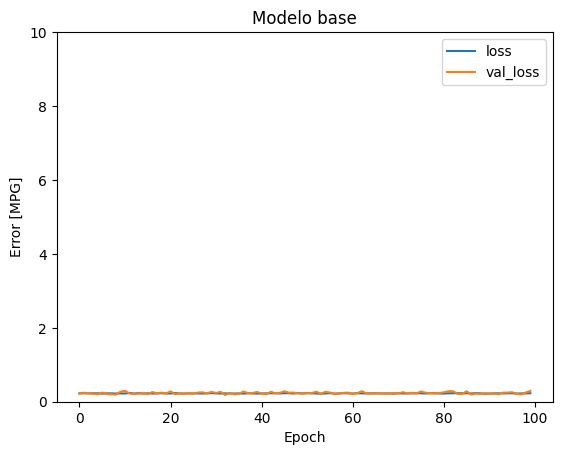

In [41]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo base")
plt.legend()

In [42]:
test_res = {}
test_res['modelo_base'] = linear_model.evaluate(
    test_X, test_y, verbose=0)

In [43]:
test_res

{'modelo_base': 0.28626298904418945}

In [44]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86 (352.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 36 (148.00 B)

## Modelo 1 con 6 neuronas

In [45]:
linear_model_6N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=6)
])

In [46]:
linear_model_6N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [47]:
%%time
history = linear_model_6N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2552 - val_loss: 0.2241
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2208 - val_loss: 0.2389
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2261 - val_loss: 0.2432
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2290 - val_loss: 0.2382
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2337 - val_loss: 0.2042
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2242 - val_loss: 0.2605
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2330 - val_loss: 0.2250
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2233 - val_loss: 0.2552
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2260 - val_loss: 0.2281
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2294 - val_loss: 0.2519
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2204 - val_loss: 0.2123
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

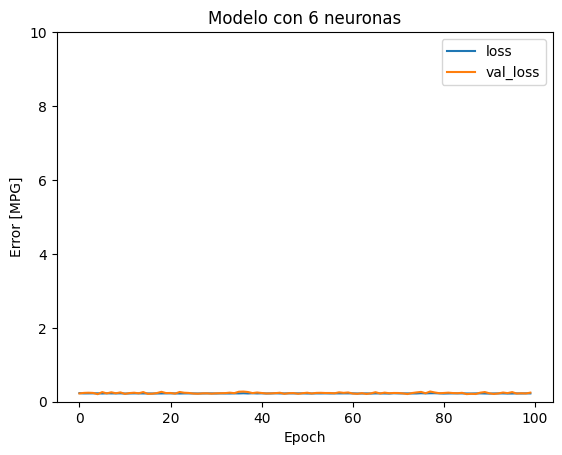

In [48]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 6 neuronas")
plt.legend()

In [49]:
test_res['modelo 6 neuronas'] = linear_model_6N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945, 'modelo 6 neuronas': 0.24393901228904724}

In [50]:
linear_model_6N.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341 (1.34 KB)

 Trainable params: 102 (408.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 206 (828.00 B)

## Modelo con 3 neuronas

In [51]:
linear_model_3N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=3)
])

In [52]:
linear_model_3N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [53]:
%%time
history = linear_model_3N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2608 - val_loss: 0.2568
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2262 - val_loss: 0.2070
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2264 - val_loss: 0.2102
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2272 - val_loss: 0.2422
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2214 - val_loss: 0.2441
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2242 - val_loss: 0.2227
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2258 - val_loss: 0.2408
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2237 - val_loss: 0.2290
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2308 - val_loss: 0.2331
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2239 - val_loss: 0.2524
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2233 - val_loss: 0.2295
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

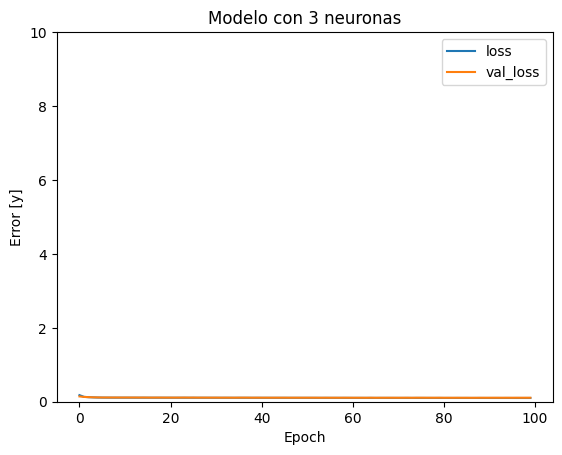

In [114]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo con 3 neuronas")
plt.legend()

In [55]:
test_res['modelo 3 neuronas'] = linear_model_3N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852}

In [56]:
linear_model_3N.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188 (760.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 104 (420.00 B)

## Modelo 18 neuronas

In [57]:
linear_model_18N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=18)
])

In [58]:
linear_model_18N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [59]:
%%time
history = linear_model_18N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2512 - val_loss: 0.2498
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2207 - val_loss: 0.2379
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2259 - val_loss: 0.2295
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2235 - val_loss: 0.2528
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2340 - val_loss: 0.2273
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2214 - val_loss: 0.2464
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2289 - val_loss: 0.2260
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2291 - val_loss: 0.2674
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2226 - val_loss: 0.2306
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2255 - val_loss: 0.2541
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2266 - val_loss: 0.2478
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

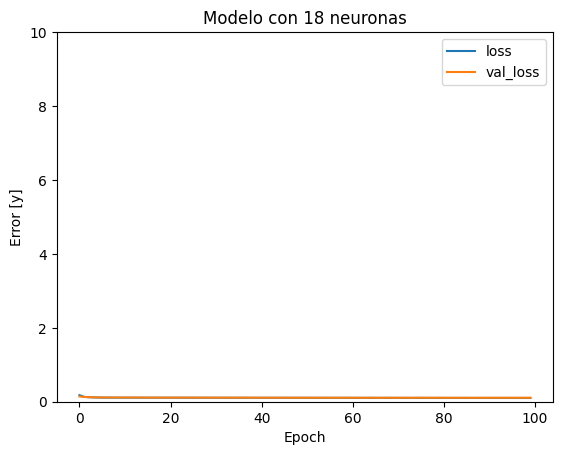

In [111]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo con 18 neuronas")
plt.legend()

In [61]:
test_res['modelo 18 neuronas'] = linear_model_18N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357}

In [62]:
linear_model_18N.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 953 (3.73 KB)

 Trainable params: 306 (1.20 KB)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 614 (2.40 KB)

## Modificamos unicamente el numero de capas

## Modelo con 3 capas


In [63]:
modelo_3_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [64]:
modelo_3_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [65]:
%%time
history = modelo_3_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1439 - val_loss: 0.1218
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1282 - val_loss: 0.1227
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1224 - val_loss: 0.1363
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1266 - val_loss: 0.1517
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1308 - val_loss: 0.1250
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1248 - val_loss: 0.1272
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1284 - val_loss: 0.1347
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1256 - val_loss: 0.1203
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1259 - val_loss: 0.1227
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1273 - val_loss: 0.1202
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1248 - val_loss: 0.1373
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

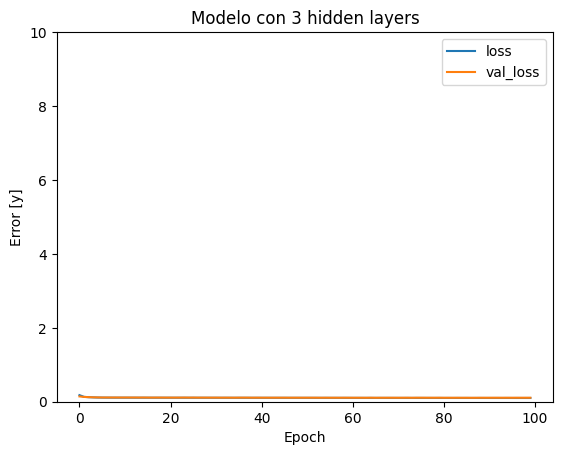

In [113]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo con 3 hidden layers")
plt.legend()

In [67]:
test_res['modelo 3 hidden layers'] = modelo_3_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357,
 'modelo 3 hidden layers': 0.14689511060714722}

In [68]:
modelo_3_layers.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98 (400.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 44 (180.00 B)

## Modelo con 6 capaz

In [69]:
modelo_6_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [70]:
modelo_6_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [71]:
%%time
history = modelo_6_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1601 - val_loss: 0.1575
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1292 - val_loss: 0.1307
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1272 - val_loss: 0.1284
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1307 - val_loss: 0.1403
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1311 - val_loss: 0.1446
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1293 - val_loss: 0.1401
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1271 - val_loss: 0.1275
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1295 - val_loss: 0.1199
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1276 - val_loss: 0.1232
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1286 - val_loss: 0.1268
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1299 - val_loss: 0.1238
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

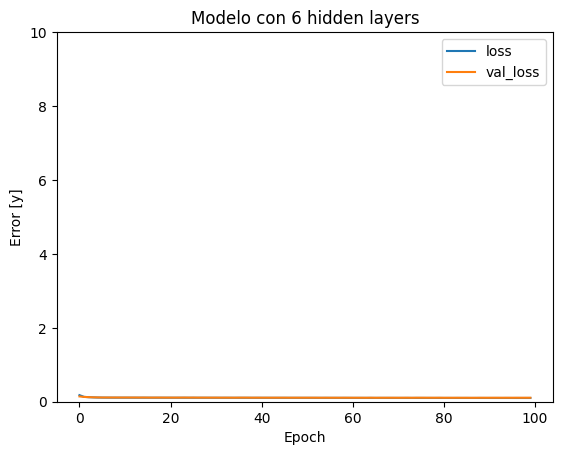

In [116]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo con 6 hidden layers")
plt.legend()

In [73]:
test_res['modelo 6 hidden layers'] = modelo_6_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357,
 'modelo 3 hidden layers': 0.14689511060714722,
 'modelo 6 hidden layers': 0.15090999007225037}

In [74]:
modelo_6_layers.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116 (472.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 56 (228.00 B)

## Modelo con 18 hidden layers

In [75]:
modelo_18_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [76]:
modelo_18_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [77]:
%%time
history = modelo_18_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1323 - val_loss: 0.1321
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1259 - val_loss: 0.1492
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1307 - val_loss: 0.1378
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1259 - val_loss: 0.1505
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1286 - val_loss: 0.1278
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1322 - val_loss: 0.1469
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1359 - val_loss: 0.1213
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1249 - val_loss: 0.1472
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1307 - val_loss: 0.1193
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1304 - val_loss: 0.1571
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1281 - val_loss: 0.1249
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

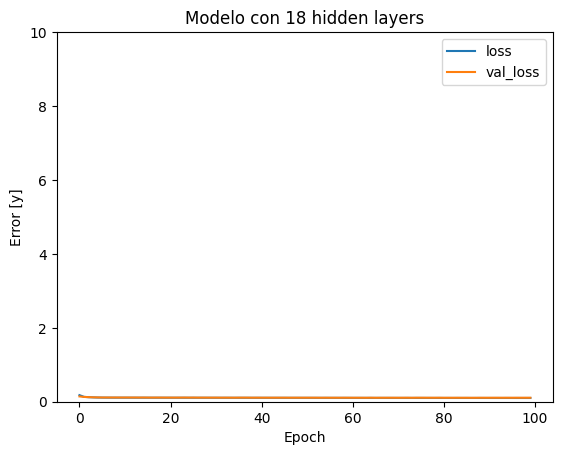

In [115]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo con 18 hidden layers")
plt.legend()

In [79]:
test_res['modelo 18 hidden layers'] = modelo_18_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357,
 'modelo 3 hidden layers': 0.14689511060714722,
 'modelo 6 hidden layers': 0.15090999007225037,
 'modelo 18 hidden layers': 0.12981323897838593}

In [80]:
modelo_18_layers.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188 (760.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 104 (420.00 B)

## Modificando el tipo de funcion de activacion

## Funcion de activacion SGD

In [117]:
modelo_sgd= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [118]:
modelo_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    loss='mean_absolute_error')

In [119]:
%%time
history = modelo_sgd.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3653 - val_loss: 0.1300
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1246 - val_loss: 0.1288
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1240 - val_loss: 0.1272
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1245 - val_loss: 0.1293
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1245 - val_loss: 0.1260
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1232 - val_loss: 0.1302
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1219 - val_loss: 0.1304
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1217 - val_loss: 0.1278
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1253 - val_loss: 0.1296
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1223 - val_loss: 0.1286
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1260 - val_loss: 0.1308
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

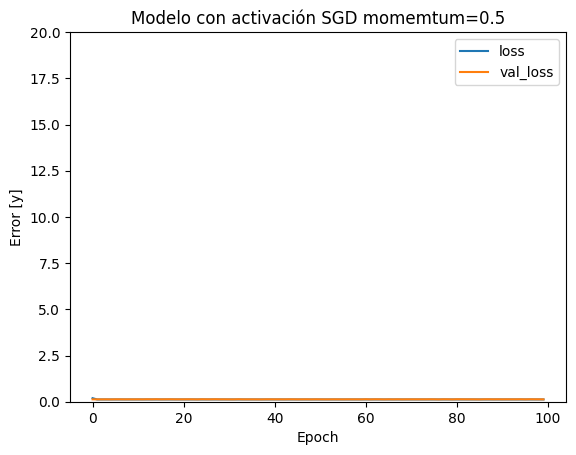

In [120]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 20])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo con activación SGD momemtum=0.5")
plt.legend()

In [85]:
test_res['modelo con SGD'] = modelo_sgd.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357,
 'modelo 3 hidden layers': 0.14689511060714722,
 'modelo 6 hidden layers': 0.15090999007225037,
 'modelo 18 hidden layers': 0.12981323897838593,
 'modelo con SGD': 0.13000480830669403}

In [86]:
modelo_sgd.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69 (284.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 19 (80.00 B)

## Modelo con  RMSprop

In [87]:
modelo_rmsprop= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [88]:
modelo_rmsprop.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.01),
    loss='mean_absolute_error')

In [89]:
%%time
history = modelo_rmsprop.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8379 - val_loss: 0.1306
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1192 - val_loss: 0.1224
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1166 - val_loss: 0.1212
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1172 - val_loss: 0.1221
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1148 - val_loss: 0.1219
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1176 - val_loss: 0.1222
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1195 - val_loss: 0.1217
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1171 - val_loss: 0.1224
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1199 - val_loss: 0.1224
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1187 - val_loss: 0.1225
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1181 - val_loss: 0.1221
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

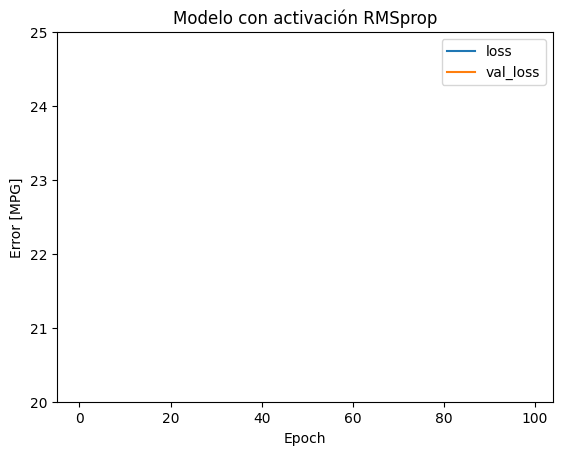

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([20, 25])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo con activación RMSprop")
plt.legend()

In [91]:
test_res['modelo con RMSprop'] = modelo_rmsprop.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357,
 'modelo 3 hidden layers': 0.14689511060714722,
 'modelo 6 hidden layers': 0.15090999007225037,
 'modelo 18 hidden layers': 0.12981323897838593,
 'modelo con SGD': 0.13000480830669403,
 'modelo con RMSprop': 0.12016092985868454}

In [92]:
modelo_rmsprop.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69 (284.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 19 (80.00 B)

## Modelo con Adam

In [93]:
modelo_nadam= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [94]:
modelo_nadam.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.00001),
    loss='mean_absolute_error')

In [95]:
%%time
history = modelo_nadam.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0869 - val_loss: 1.0652
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0620 - val_loss: 1.0481
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0513 - val_loss: 1.0311
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0367 - val_loss: 1.0141
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0108 - val_loss: 0.9972
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9961 - val_loss: 0.9804
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9846 - val_loss: 0.9638
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9638 - val_loss: 0.9473
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9610 - val_loss: 0.9309
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9286 - val_loss: 0.9146
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9157 - val_loss: 0.8985
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

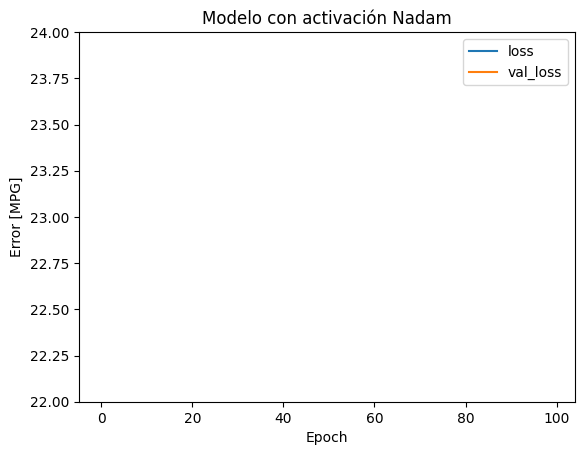

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([22, 24])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo con activación Nadam")
plt.legend()

In [97]:
test_res['modelo con Nadam'] = modelo_nadam.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357,
 'modelo 3 hidden layers': 0.14689511060714722,
 'modelo 6 hidden layers': 0.15090999007225037,
 'modelo 18 hidden layers': 0.12981323897838593,
 'modelo con SGD': 0.13000480830669403,
 'modelo con RMSprop': 0.12016092985868454,
 'modelo con Nadam': 0.13205184042453766}

In [98]:
modelo_nadam.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87 (356.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 37 (152.00 B)

## Modelos que optimizarian el MAE

## Modelo few hidden layer and couple of neurons

In [99]:
modelo_3_layers_3_neurons = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(3)
  ])

In [100]:
modelo_3_layers_3_neurons.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [101]:
%%time
history = modelo_3_layers_3_neurons.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1415 - val_loss: 0.1354
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1274 - val_loss: 0.1343
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1280 - val_loss: 0.1305
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1268 - val_loss: 0.1323
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1258 - val_loss: 0.1284
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1290 - val_loss: 0.1313
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1311 - val_loss: 0.1320
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1280 - val_loss: 0.1351
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1259 - val_loss: 0.1386
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1292 - val_loss: 0.1310
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1303 - val_loss: 0.1350
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

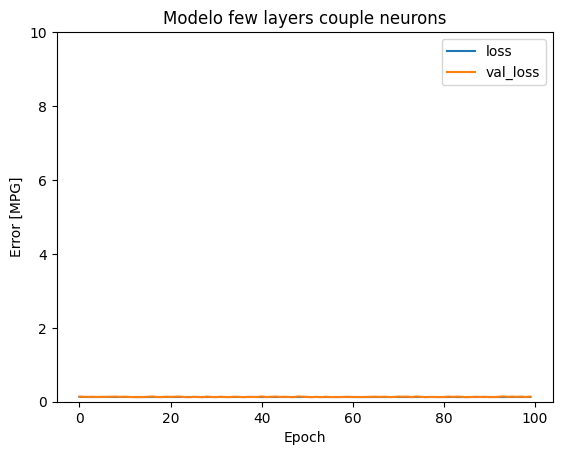

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo few layers couple neurons")
plt.legend()

In [103]:
test_res['modelo few hidden layers couple neurons'] = modelo_3_layers_3_neurons.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357,
 'modelo 3 hidden layers': 0.14689511060714722,
 'modelo 6 hidden layers': 0.15090999007225037,
 'modelo 18 hidden layers': 0.12981323897838593,
 'modelo con SGD': 0.13000480830669403,
 'modelo con RMSprop': 0.12016092985868454,
 'modelo con Nadam': 0.13205184042453766,
 'modelo few hidden layers couple neurons': 0.13703787326812744}

In [104]:
modelo_3_layers_3_neurons.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,284 (12.84 KB)

 Trainable params: 1,083 (4.23 KB)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 2,168 (8.47 KB)

## Model with few layers, couple of neurons

In [105]:
modelo_3_layers_3_neurons_SGD = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(3)
  ])

In [106]:
modelo_3_layers_3_neurons_SGD.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    loss='mean_absolute_error')

In [107]:
%%time
history = modelo_3_layers_3_neurons_SGD.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2327 - val_loss: 0.1434
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1367 - val_loss: 0.1297
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1224 - val_loss: 0.1236
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1198 - val_loss: 0.1190
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1146 - val_loss: 0.1161
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1122 - val_loss: 0.1145
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1108 - val_loss: 0.1140
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1080 - val_loss: 0.1140
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1061 - val_loss: 0.1137
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1095 - val_loss: 0.1136
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1084 - val_loss: 0.1136
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

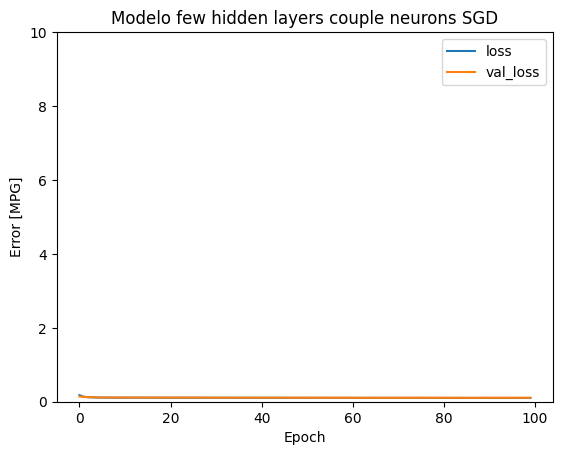

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [y]')
plt.title("Modelo few hidden layers couple neurons SGD")
plt.legend()

In [109]:
test_res['modelo few hidden layers couple neurons SGD'] = modelo_3_layers_3_neurons_SGD.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.28626298904418945,
 'modelo 6 neuronas': 0.24393901228904724,
 'modelo 3 neuronas': 0.21916437149047852,
 'modelo 18 neuronas': 0.2258405089378357,
 'modelo 3 hidden layers': 0.14689511060714722,
 'modelo 6 hidden layers': 0.15090999007225037,
 'modelo 18 hidden layers': 0.12981323897838593,
 'modelo con SGD': 0.13000480830669403,
 'modelo con RMSprop': 0.12016092985868454,
 'modelo con Nadam': 0.13205184042453766,
 'modelo few hidden layers couple neurons': 0.13703787326812744,
 'modelo few hidden layers couple neurons SGD': 0.10574601590633392}

In [110]:
modelo_3_layers_3_neurons_SGD.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,201 (8.61 KB)

 Trainable params: 1,083 (4.23 KB)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 1,085 (4.24 KB)